In [59]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

%matplotlib inline

os.chdir('/Users/chasedawson/dev/uva_equity_center/summer-sandbox/nfhl')
os.getcwd()

'/Users/chasedawson/dev/uva_equity_center/summer-sandbox/nfhl'

In [40]:
def read_spatial_data(basename, clip_coast=False, path_to_spatial_data="/../spatial_units/data"):
    """
    Reads in spatial data that is in the format 'basename_spatialUnit.shp'.
    
    Parameters
    ----------
    basename : str, required
        Base name of shape files. For example, if the files you want to read are of the format
        'cville_counties.shp', 'cville_blocks.shp', etc. then the basename is 'cville'.
        
    clip_coast : bool, optional (default is False)
        If True, shp data will be compared to coast line data and oceans will be clipped out.
    
    Output
    ------
    dictionary containing geopandas dataframes for each spatial unit
    
    """
    print('Reading spatial data for {basename}...'.format(basename = basename))
    # read in coast line data 
    if clip_coast:
        ocean = gpd.read_file('water/ne_10m_ocean.shp')
    
    # store current working directory
    og_wd = os.getcwd()
    
    
    # change working directory to where spatial data is located
    os.chdir(og_wd + path_to_spatial_data)
    
    # create empty dictionary
    data = {}
    
    if clip_coast:
        spatial_units = ['blocks', 'blkgps', 'tracts']

        # read in counties and clip first
        print("Reading counties...")
        counties = gpd.read_file(basename + '_counties.shp')
        ocean = ocean.to_crs(counties.crs)
        counties = gpd.overlay(counties, ocean, how='difference')
        data['counties'] = counties
        print("Done.")
    
        # read in rest of shapefiles, clip respective to counties, store as keys in dict
        for spatial_unit in spatial_units:
            print("Reading {spatial_unit}...".format(spatial_unit = spatial_unit))
            # read in shp file
            shp = gpd.read_file(basename + '_{spatial_unit}.shp'.format(spatial_unit = spatial_unit))

            # convert coast line data to crs of shp 
            counties = counties.to_crs(shp.crs)

            # clip out ocean
            shp = gpd.overlay(shp, counties[['geometry']], how='intersection', keep_geom_type=True)

            # add dict with spatial unit as key
            data[spatial_unit] = shp
            print("Done.")
            
    else:
        spatial_units = ['counties', 'blocks', 'blkgps', 'tracts']
        for spatial_unit in spatial_units:
            print("Reading {spatial_unit}...".format(spatial_unit = spatial_unit))
            shp = gpd.read_file(basename + '_{spatial_unit}.shp'.format(spatial_unit = spatial_unit))
            data[spatial_unit] = shp
            print("Done.")

    # reset back to original working directory
    os.chdir(og_wd)
    
    return data

In [41]:
cville_spatial_data = read_spatial_data("cville")
# eastshore_spatial_data = read_spatial_data("easternShore", clip_coast = True)

Reading spatial data for cville...
Reading counties...
Done.
Reading blocks...
Done.
Reading blkgps...
Done.
Reading tracts...
Done.


In [42]:
accomack_data_path = "./data/accomack/51001C_20150617"
northampton_data_path = "./data/northampton/51131C_20150302"

eastshore_data_paths = [
    accomack_data_path,
    northampton_data_path
]

charlottesville_data_path = "./data/charlottesville/51003C_20210712"
albemarle_data_path = "./data/albemarle/51003C_20210712"
fluvanna_data_path = "./data/fluvanna/51003C_20210712"
greene_data_path = "./data/greene/51079C_20210323"
louisa_data_path = "./data/louisa/51109C_20200723"
nelson_data_path = "./data/nelson/51125C_20100618"

cville_data_paths = [
    albemarle_data_path,
    charlottesville_data_path, 
    fluvanna_data_path,
    greene_data_path,
    louisa_data_path,
    nelson_data_path
]

In [43]:
def read_paths(paths):
    return pd.concat([gpd.read_file(path) for path in paths])

In [44]:
paths = [os.path.join(data_path, "S_Fld_Haz_Ar.shp") for data_path in eastshore_data_paths]
eastshore_fld_haz_ar = read_paths(paths)
eastshore_fld_haz_ar.head()

,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,AR_SUBTRV,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,geometry
0,51001C,1.1.1.0,51001C_51001C_491,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51001C_51001C_STUDY2,"POLYGON ((-75.35198 37.92819, -75.35207 37.928..."
1,51001C,1.1.1.0,51001C_51001C_492,NP,AE,None,T,10.0,NAVD88,-9999.0,Feet,-9999.0,None,None,None,-9999.0,-9999.0,None,51001C_51001C_STUDY2,"POLYGON ((-75.64995 37.92998, -75.64994 37.930..."
2,51001C,1.1.1.0,51001C_51001C_488,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51001C_51001C_STUDY2,"POLYGON ((-75.34462 37.92899, -75.34462 37.929..."
3,51001C,1.1.1.0,51001C_51001C_489,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51001C_51001C_STUDY2,"POLYGON ((-75.38406 37.93054, -75.38406 37.930..."
4,51001C,1.1.1.0,51001C_51001C_490,NP,AE,None,T,5.0,NAVD88,-9999.0,Feet,-9999.0,None,None,None,-9999.0,-9999.0,None,51001C_51001C_STUDY2,"POLYGON ((-75.37010 37.92721, -75.37037 37.927..."


In [45]:
paths = [os.path.join(data_path, "S_Fld_Haz_Ar.shp") for data_path in cville_data_paths]
cville_fld_haz_ar = read_paths(paths)
cville_fld_haz_ar.head()

,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,AR_SUBTRV,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,geometry
0,51003C,1.1.1.0,51003C_788,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51003C_FIS1,"POLYGON ((-78.54919 38.12872, -78.54919 38.128..."
1,51003C,1.1.1.0,51003C_853,NP,A,None,T,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51003C_FIS1,"POLYGON ((-78.70209 37.81493, -78.70225 37.815..."
2,51003C,1.1.1.0,51003C_865,NP,A,None,T,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51003C_FIS1,"POLYGON ((-78.67918 38.02400, -78.67903 38.024..."
3,51003C,1.1.1.0,51003C_968,NP,AE,None,T,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51003C_FIS1,"POLYGON ((-78.56976 38.06583, -78.56964 38.065..."
4,51003C,1.1.1.0,51003C_864,NP,A,None,T,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,51003C_FIS1,"POLYGON ((-78.52482 37.99485, -78.52485 37.994..."


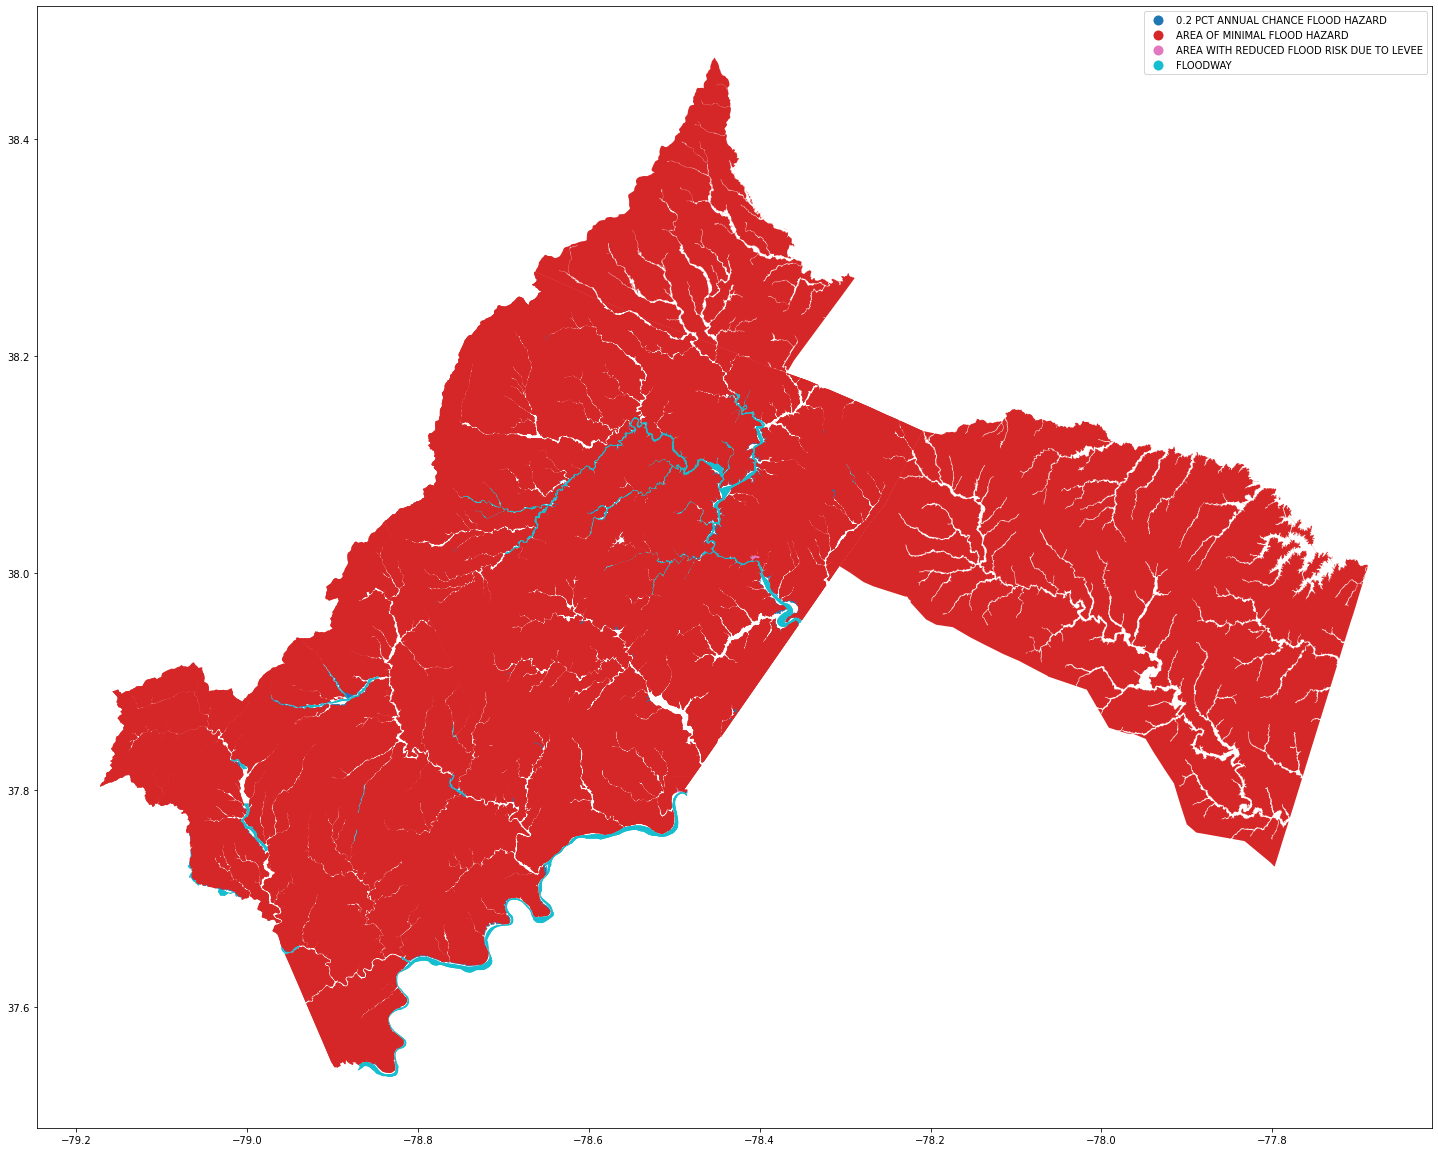

In [46]:
f, ax = plt.subplots(figsize=(25, 25))
cville_fld_haz_ar.plot("ZONE_SUBTY", ax=ax, legend=True)
plt.show()

In [48]:
def get_area(a):
    # get area of shp in km^2
    return round(a.geometry.to_crs("EPSG:3395").map(lambda p: p.area / 10**6).iloc[0], 6)

def get_intersection_area(a, b):
    """
    Computes the intersection of a and b and returns the intersection area and size of the intersected area
    as a percentage of the total area of a.
    
    Parameters
    ----------
    a : geopandas GeoDataFrame, required
    b : geopandas GeoDataFrame, required
    """
    intersection = gpd.overlay(a, b, how='intersection')
    if len(intersection) == 0:
        return {'area': 0, 'percent': 0}
    
    # get area of intersection in km^2
    intersect_area = get_area(intersection)
    
    # get area of original shp in km^2
    shp_area = get_area(a)
    
    # compute percentage of intersection of shp
    percentage = (intersect_area / shp_area) * 100
    
    return {'area': intersect_area, 'percent': percentage}

In [49]:
fld_zones = cville_fld_haz_ar.ZONE_SUBTY.value_counts().index.tolist()
fld_zones

['0.2 PCT ANNUAL CHANCE FLOOD HAZARD',
 'AREA OF MINIMAL FLOOD HAZARD',
 'FLOODWAY',
 'AREA WITH REDUCED FLOOD RISK DUE TO LEVEE']

In [53]:
cville_spatial_data['tracts'].COUNTYFP

0     109
1     109
2     079
3     079
4     003
5     003
6     003
7     003
8     003
9     003
10    003
11    003
12    003
13    540
14    109
15    125
16    125
17    125
18    540
19    079
20    540
21    065
22    065
23    003
24    109
25    109
26    109
27    065
28    065
29    003
30    003
31    003
32    003
33    003
34    003
35    003
36    003
37    003
38    003
39    003
40    540
41    540
42    540
43    540
44    540
45    540
46    540
47    540
48    540
49    003
Name: COUNTYFP, dtype: object

In [60]:
area_df = pd.DataFrame()
for zone in fld_zones:
    print('Starting Zone: {zone}'.format(zone = zone))
    zone_df = cville_fld_haz_ar[cville_fld_haz_ar.ZONE_SUBTY == zone].dissolve()
    for spatial_unit in ['counties', 'tracts', 'blkgps', 'blocks']:
        print('Starting Spatial Unit: {spatial_unit}'.format(spatial_unit = spatial_unit))
        area_data = {'GEOID': [], 'zone': [], 'spatial_unit': [], 'area': [], 'perc': []}
        region = cville_spatial_data[spatial_unit]
        if spatial_unit == "tracts":
            intersected_areas = area_df[(area_df.zone == zone) & (area_df.spatial_unit == "counties") & (area_df.area > 0)]
            intersected_counties = cville_spatial_data['counties'][cville_spatial_data['counties'].GEOID.isin(intersected_areas.GEOID.values)]
            region = region[region['COUNTYFP'].isin(intersected_counties['COUNTYFP'].values)]
        elif spatial_unit == "blkgps":
            intersected_areas = area_df[(area_df.zone == zone) & (area_df.spatial_unit == "tracts") & (area_df.area > 0)]
            intersected_tracts = cville_spatial_data['tracts'][cville_spatial_data['tracts'].GEOID.isin(intersected_areas.GEOID.values)]
            region = region[region['TRACTCE'].isin(intersected_tracts['TRACTCE'].values)]
        elif spatial_unit == "blocks":
            intersected_areas = area_df[(area_df.zone == zone) & (area_df.spatial_unit == "tracts") & (area_df.area > 0)]
            intersected_tracts = cville_spatial_data['tracts'][cville_spatial_data['tracts'].GEOID.isin(intersected_areas.GEOID.values)]
            region = region[region['TRACTCE'].isin(intersected_tracts['TRACTCE'].values)]
        for i in tqdm(range(len(region))):
            shp = region.iloc[[i]]
            stats = get_intersection_area(shp, zone_df)
            
            # append data to area data
            area_data['GEOID'].append(shp.GEOID.iloc[0])
            area_data['zone'].append(zone)
            area_data['spatial_unit'].append(spatial_unit)
            area_data['area'].append(stats['area'])
            area_data['perc'].append(stats['percent'])
            
        area_df = pd.concat([area_df, pd.DataFrame(area_data)])
area_df.head()        

Starting Zone: 0.2 PCT ANNUAL CHANCE FLOOD HAZARD
Starting Spatial Unit: counties


  0%|          | 0/41 [00:00<?, ?it/s]

Starting Spatial Unit: tracts


  2%|▏         | 2/105 [00:00<00:07, 13.58it/s]

Starting Spatial Unit: blkgps


  0%|          | 2/7594 [00:00<09:40, 13.07it/s]

Starting Spatial Unit: blocks


100%|██████████| 7594/7594 [10:21<00:00, 12.22it/s]


Starting Zone: AREA OF MINIMAL FLOOD HAZARD


  0%|          | 0/6 [00:00<?, ?it/s]

Starting Spatial Unit: counties


  0%|          | 0/50 [00:00<?, ?it/s]

Starting Spatial Unit: tracts


  0%|          | 0/152 [00:00<?, ?it/s]

Starting Spatial Unit: blkgps


  0%|          | 0/10503 [00:00<?, ?it/s]

Starting Spatial Unit: blocks


100%|██████████| 10503/10503 [5:00:04<00:00,  1.71s/it] 


Starting Zone: FLOODWAY


 17%|█▋        | 1/6 [00:00<00:01,  4.78it/s]

Starting Spatial Unit: counties


  2%|▏         | 1/41 [00:00<00:07,  5.28it/s]

Starting Spatial Unit: tracts


  0%|          | 0/105 [00:00<?, ?it/s]

Starting Spatial Unit: blkgps


  0%|          | 4/7594 [00:00<03:59, 31.63it/s]

Starting Spatial Unit: blocks


  0%|          | 0/6 [00:00<?, ?it/s]

Starting Zone: AREA WITH REDUCED FLOOD RISK DUE TO LEVEE
Starting Spatial Unit: counties


 19%|█▉        | 5/26 [00:00<00:00, 44.30it/s]

Starting Spatial Unit: tracts


  0%|          | 0/9 [00:00<?, ?it/s]

Starting Spatial Unit: blkgps


  1%|          | 5/932 [00:00<00:21, 42.84it/s]

Starting Spatial Unit: blocks


100%|██████████| 932/932 [00:24<00:00, 37.49it/s]


,GEOID,zone,spatial_unit,area,perc
0,51540,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,counties,0.725061,1.696418
1,51079,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,counties,0.000000,0.000000
2,51003,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,counties,9.297866,0.307655
3,51125,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,counties,4.879867,0.248771
4,51065,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,counties,0.026992,0.002237


In [62]:
os.getcwd()

'/Users/chasedawson/dev/uva_equity_center/summer-sandbox/nfhl'

In [63]:
area_df.to_csv('data/cville_fld_zone_intersection.csv')

In [17]:
fld_zone = cville_fld_haz_ar[cville_fld_haz_ar.ZONE_SUBTY == "0.2 PCT ANNUAL CHANCE FLOOD HAZARD"].dissolve()
area_data = {'GEOID': [], 'area': [], 'perc': []}
for i in range(len(cville_spatial_data['counties'])):
    county = cville_spatial_data['counties'].iloc[[i]]
    stats = get_intersection_area(county, fld_zone)
    area_data['area'].append(stats['area'])
    area_data['perc'].append(stats['percent'])
    area_data['GEOID'].append(county.GEOID.iloc[0])
area_df = pd.DataFrame(area_data)
area_df.head()

,GEOID,area,perc
0,51540,0.725061,1.696418
1,51079,0.000000,0.000000
2,51003,9.297866,0.307655
3,51125,4.879867,0.248771
4,51065,0.026992,0.002237


<AxesSubplot:>

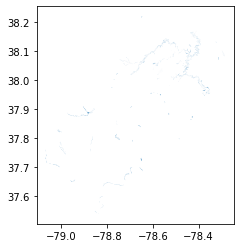

In [11]:
cville_fld_haz_ar[cville_fld_haz_ar.ZONE_SUBTY == "0.2 PCT ANNUAL CHANCE FLOOD HAZARD"].dissolve().plot()

In [7]:
fld_haz_ar.FLD_ZONE.value_counts()

NameError: name 'fld_haz_ar' is not defined